In [121]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
hist = pd.read_csv("https://raw.githubusercontent.com/ebesier/208finalproject/main/checkpoints_pums/model_history.csv")
hist.head()

,epoch,loss,accuracy,val_loss,val_accuracy,epsilon,delta,best
0,0,1.8827,0.3258,1.7265,0.3775,0.0302,0.0,0
1,1,1.8068,0.3368,1.6689,0.3941,13.0314,0.0,0
2,2,1.7731,0.3541,1.6188,0.4187,13.7069,0.0,0
3,3,1.7291,0.3775,1.5171,0.4491,14.3824,0.0,0
4,4,1.6546,0.4239,1.3319,0.5536,15.0579,0.0,0


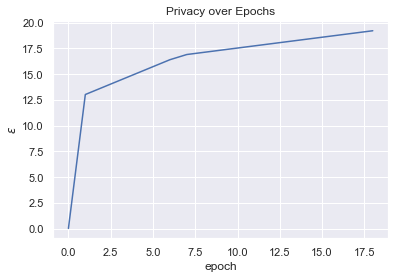

In [123]:
# Plot epsilon growth.

sns.set()

x = hist[['epoch']]
y = hist[['epsilon']]

plt.plot(x, y)
plt.xlabel('epoch')
plt.ylabel(r'$\epsilon$')
plt.title('Privacy over Epochs');

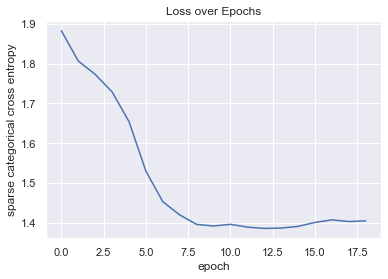

In [124]:
sns.set()

x = hist[['epoch']]
y = hist[['loss']]

plt.plot(x, y)
plt.xlabel('epoch')
plt.ylabel('sparse categorical cross entropy')
plt.title('Loss over Epochs');

In [125]:
import pandas as pd

# Read in PUMS data
data_original = pd.read_csv("https://raw.githubusercontent.com/privacytoolsproject/cs208/master/data/MaPUMS5full.csv")

In [126]:
# Read in synthetic data

data_synthetic = pd.read_csv("https://raw.githubusercontent.com/ebesier/208finalproject/main/syn_data_pums.txt", header = None)

In [127]:
data_synthetic.columns = data_original.columns

In [128]:
pd.get_option("display.max_columns")
pd.set_option('display.max_colwidth', 300)
data_original.head(5).append(data_original.tail(5))

,state,puma,sex,age,educ,income,latino,black,asian,married,divorced,uscitizen,children,disability,militaryservice,employed,englishability,fips
0,25,100,0,33,10,35000.0,0,0,0,1,0,1,0,0,0,1,1,25003
1,25,100,0,60,10,1900.0,0,0,0,1,0,1,0,1,0,0,1,25003
2,25,100,1,60,9,0.0,0,0,0,1,0,1,0,0,0,0,1,25003
3,25,100,0,34,9,17000.0,0,0,0,0,0,1,0,0,0,1,1,25003
4,25,100,0,28,9,19300.0,0,0,0,1,0,1,0,0,1,1,1,25003
241825,25,900,1,47,9,37000.0,0,0,0,0,1,1,0,1,0,1,1,25009
241826,25,900,1,62,4,0.0,0,0,0,1,0,1,0,0,0,0,1,25009
241827,25,900,0,78,10,16700.0,0,0,0,1,0,1,0,1,1,0,1,25009
241828,25,900,1,48,13,36950.0,0,0,0,0,1,1,0,1,0,1,1,25009
241829,25,900,0,34,13,35000.0,0,0,0,0,0,1,0,0,0,0,1,25009


In [129]:
data_synthetic.head()

,state,puma,sex,age,educ,income,latino,black,asian,married,divorced,uscitizen,children,disability,militaryservice,employed,englishability,fips
0,25.0,711.0,12001.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2557272.0
1,25.0,2.0,2100.0,0.0,35.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,15011.0
2,7005.0,0.0,1.0,15.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,6.0,250.0
3,25.0,25.0,101.0,0.0,0.0,140.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25101.0
4,45.0,21100.0,1.0,3.0,14.0,1000000.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,25.0


In [130]:
# Some preliminary cleaning 

data_synthetic['latino'] = np.where(data_synthetic['latino'] > 1, 1, data_synthetic['latino'])
data_synthetic['latino'] = np.where(data_synthetic['latino'] < 0, 0, data_synthetic['latino'])

data_synthetic['black'] = np.where(data_synthetic['black'] > 1, 1, data_synthetic['black'])
data_synthetic['black'] = np.where(data_synthetic['black'] < 0, 0, data_synthetic['black'])

data_synthetic['asian'] = np.where(data_synthetic['asian'] > 1, 1, data_synthetic['asian'])
data_synthetic['asian'] = np.where(data_synthetic['asian'] < 0, 0, data_synthetic['asian'])

data_synthetic['married'] = np.where(data_synthetic['married'] > 1, 1, data_synthetic['married'])
data_synthetic['married'] = np.where(data_synthetic['married'] < 0, 0, data_synthetic['married'])

data_synthetic['divorced'] = np.where(data_synthetic['divorced'] > 1, 1, data_synthetic['divorced'])
data_synthetic['divorced'] = np.where(data_synthetic['divorced'] < 0, 0, data_synthetic['divorced'])

data_synthetic['children'] = np.where(data_synthetic['children'] > 16, 16, data_synthetic['children'])
data_synthetic['children'] = np.where(data_synthetic['children'] < 0, 0, data_synthetic['children'])

data_synthetic['disability'] = np.where(data_synthetic['disability'] > 1, 1, data_synthetic['disability'])
data_synthetic['disability'] = np.where(data_synthetic['disability'] < 0, 0, data_synthetic['disability'])

data_synthetic['divorced'] = np.where(data_synthetic['divorced'] > 1, 1, data_synthetic['divorced'])
data_synthetic['divorced'] = np.where(data_synthetic['divorced'] < 0, 0, data_synthetic['divorced'])

data_synthetic['militaryservice'] = np.where(data_synthetic['militaryservice'] > 1, 1, data_synthetic['militaryservice'])
data_synthetic['militaryservice'] = np.where(data_synthetic['militaryservice'] < 0, 0, data_synthetic['militaryservice'])

data_synthetic['employed'] = np.where(data_synthetic['employed'] > 1, 1, data_synthetic['employed'])
data_synthetic['employed'] = np.where(data_synthetic['employed'] < 0, 0, data_synthetic['employed'])

data_synthetic['englishability'] = np.where(data_synthetic['englishability'] > 1, 1, data_synthetic['englishability'])
data_synthetic['englishability'] = np.where(data_synthetic['englishability'] < 0, 0, data_synthetic['englishability'])

data_synthetic['age'] = np.where(data_synthetic['age'] > 100, 100, data_synthetic['age'])
data_synthetic['age'] = np.where(data_synthetic['age'] < 0, 0, data_synthetic['age'])

data_synthetic['educ'] = np.where(data_synthetic['educ'] > 16, 16, data_synthetic['educ'])
data_synthetic['educ'] = np.where(data_synthetic['educ'] < 1, 1, data_synthetic['educ'])

data_synthetic['sex'] = np.where(data_synthetic['sex'] > 1, 1, data_synthetic['sex'])
data_synthetic['sex'] = np.where(data_synthetic['sex'] < 0, 0, data_synthetic['sex'])

data_synthetic['income'] = pd.to_numeric(data_synthetic['income'])

data_original['income'] = pd.to_numeric(data_original['income'])
data_synthetic = data_synthetic.dropna()

### Queries

Here we compare the mean of the **income** variable between datasets. 

In [131]:
mean_arr = []

num_samples = 5000

for i in range(1000):
    
    bootstrap = np.random.choice(data_original.iloc[:, 5], num_samples, replace = True)
    
    mean = np.mean(bootstrap)
    mean_arr.append(mean)

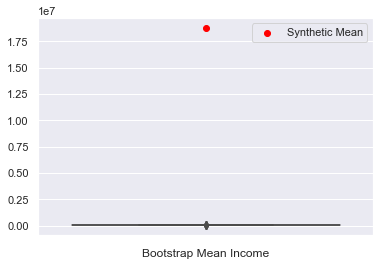

In [132]:
ax = sns.boxplot(data=np.array(mean_arr))
ax.set(xticklabels=[])
ax.scatter([0], [np.mean(data_synthetic.iloc[:, 5])], color = 'red', label = 'Synthetic Mean')
plt.legend()
ax.set_xlabel('Bootstrap Mean Income');

### Wasserstein Distance

Here, we'll check the Wassertein distance between **income** arrays.

In [133]:
from scipy.stats import wasserstein_distance
data_synthetic = data_synthetic.dropna()

dist_arr = []

num_samples = 5000

for i in range(1000):
    
    bootstrap = np.random.choice(data_original.iloc[:, 5], num_samples, replace = True)
    dist = wasserstein_distance(bootstrap, data_synthetic.iloc[:, 5])
    dist_arr.append(dist)

In [134]:
print('Average Wasserstein distance: ', np.mean(dist_arr))

Average Wasserstein distance:  18797589.01780544


Does this value make sense? Let's check the average for the income variable.

In [135]:
np.mean(mean_arr)

33770.8160836

In [137]:
np.mean(data_synthetic.iloc[:, 5])

18785655.72588565

Here, we'll check the Wassertein distance between **age** arrays.

In [138]:
from scipy.stats import wasserstein_distance
data_synthetic = data_synthetic.dropna()

dist_arr = []

num_samples = 5000

for i in range(1000):
    
    bootstrap = np.random.choice(data_original.iloc[:, 3], num_samples, replace = True)
    dist = wasserstein_distance(bootstrap, data_synthetic.iloc[:, 3])
    dist_arr.append(dist)

In [144]:
print('Average Wasserstein distance: ', np.mean(dist_arr))

Average Wasserstein distance:  35.78181530507261


Finally, we'll measure total variation distance of **education** using TVD.

In [147]:
tvds = []
num_samples = len(data_synthetic.iloc[:, 2])

for i in range(1000):
    bootstrap = np.random.choice(data_original.iloc[:, 4], num_samples, replace = True)
    unique, counts = np.unique(bootstrap, return_counts=True)
    probs_orig = counts/len(bootstrap)
    
    unique, synt_counts = np.unique(data_synthetic.iloc[:, 4].to_numpy(), return_counts=True)
    probs_syn = synt_counts/len(data_synthetic)
    
    tvd = 0.5 * sum(abs(probs_orig - probs_syn))
    tvds.append(tvd)

In [148]:
print('Average total variation distance: ', np.mean(tvds))

Average total variation distance:  0.8385514223194748


### Covariance of Variables

Let's check the dependence between the **age** and **income variable**.

In [149]:
from scipy.stats import pearsonr

corr_arr = []

num_samples = 5000

for i in range(1000):
    
    bootstrap_age = np.random.choice(data_original.loc[:, 'age'], num_samples, replace = True)
    bootstrap_educ = np.random.choice(data_original.loc[:, 'income'], num_samples, replace = True)
    
    corr, _ = pearsonr(bootstrap_age, bootstrap_educ)
    corr_arr.append(corr)

In [150]:
np.mean(corr_arr)

-0.0006804153079542725

In [151]:
data_synthetic = data_synthetic.dropna()
corr, _ = pearsonr(data_synthetic.loc[:, 'age'], data_synthetic.loc[:, 'income'])

In [152]:
corr

-0.0011378027569102628

In [153]:
abs(np.mean(corr_arr) - corr)

0.0004573874489559903

**Age** and **income** are independent in both datasets. Now, let's check **age** and **education**.

In [154]:
from scipy.stats import chi2_contingency

In [156]:
v_scores = []

for i in range(1000):
    data = data_original.loc[:, ['age', 'educ']].sample(n=num_samples).to_numpy()
    X2 = chi2_contingency(data, correction=False)[0]
    n = data.sum()
    minDim = min(data.shape)-1

    # Calculate Cramer's V 
    V = np.sqrt((X2/n) / minDim)
    v_scores.append(V)

In [157]:
# Display Cramer's V

print(np.mean(v_scores))

0.20120013082162125


In [158]:
data = data_synthetic.loc[:, ['age', 'educ']].to_numpy()
X2 = chi2_contingency(data, correction=False)[0]
n = np.sum(data)
minDim = min(data.shape)-1

# Calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

# Display Cramer's V
print(V)

0.8195950876784404


### Point Estimates

What's the probability of being male or female?

In [159]:
# Probability of being male or female

prob_arr = []

num_samples = 5000

for i in range(1000):
    
    bootstrap = np.random.choice(data_original.loc[:, 'sex'], num_samples, replace = True)
    unique, counts = np.unique(bootstrap, return_counts=True)
    prob_arr.append(counts/num_samples)

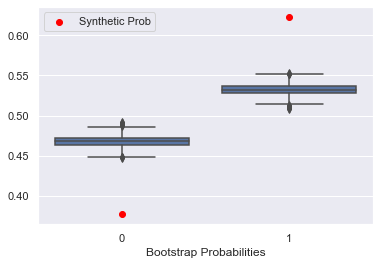

In [160]:
ax = sns.boxplot(data=np.array(prob_arr), color = 'b')
ax.set(xticklabels=[0, 1])
unique, synt_counts = np.unique(data_synthetic.loc[:, 'sex'], return_counts=True)
ax.scatter([0, 1], synt_counts/len(data_synthetic), color = 'red', label = 'Synthetic Prob')
plt.legend();
ax.set_xlabel('Bootstrap Probabilities');

For this variable we know the ground truth should be around 0.5. The results of the synthetic data are a bit off!